# Algo-trading: Sentimental Analysis Indicator
> Author: **Felipe Dominguez & Nicola Bini**
>
> Date: **06/17/2021**
>
> **Team 2:**
>Nicola Bini
<br>
>Felipe Dominguez
<br>
>Tri Dung Dinh
<br>
>Manuel Echazarra
<br>
## Summary
This code provides join Sentimental Analysis and Machine Learning Analysis together to perform a better strategy.

In [26]:
# Import libraries
import bt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [65]:
# download data
tickets    = ["OCGN", "HGEN", "VUZI", "DNN"]
start_date = "2019-12-09"
end_date   = "2021-06-08"
test_data  = bt.get(tickets, start=start_date, end=end_date)

# Import ML signals
test_signal_OCGN = pd.read_csv("test_signal_OCGN.csv")
test_signal_HGEN = pd.read_csv("test_signal_HGEN.csv")
test_signal_VUZI = pd.read_csv("test_signal_VUZI.csv")
test_signal_DNN  = pd.read_csv("test_signal_DNN.csv")

# Import Sentimental Analysis signal
signals_sen = pd.read_csv("sentimental_analysis_signal.csv")
signals_sen['date'] = signals_sen['date'].astype(np.datetime64)
signals_sen = signals_sen.set_index('date')

# Fix type of date
test_signal_OCGN['date'] = test_signal_OCGN['date'].astype(np.datetime64)
test_signal_HGEN['date'] = test_signal_HGEN['date'].astype(np.datetime64)
test_signal_VUZI['date'] = test_signal_VUZI['date'].astype(np.datetime64)
test_signal_DNN['date']  = test_signal_DNN['date'].astype(np.datetime64)

# Set date as index
test_signal_OCGN = test_signal_OCGN.set_index("date")
test_signal_HGEN = test_signal_HGEN.set_index("date")
test_signal_VUZI = test_signal_VUZI.set_index("date")
test_signal_DNN  = test_signal_DNN.set_index("date")


In [66]:
#Here we concatenete the sentimental signals for each stock and dropn na's
signals_sen = pd.concat([test_signal_sent_OCGN,
                         test_signal_sent_HGEN,
                         test_signal_sent_VUZI,
                         test_signal_sent_DNN], axis=1)

signals_sen=signals_sen.dropna()
signals_sen

,ocgn,hgen,vuzi,dnn
date,,,,
2019-12-09,-0.25,0.25,0.25,-0.25
2019-12-10,-0.25,0.25,-0.25,-0.25
2019-12-11,-0.25,0.25,0.25,-0.25
2019-12-12,-0.25,0.25,0.25,-0.25
2019-12-13,0.25,-0.25,0.25,-0.25
...,...,...,...,...
2021-06-01,-0.25,0.25,0.25,0.25
2021-06-02,-0.25,0.25,0.25,0.25
2021-06-03,0.25,0.25,0.25,0.25


In [67]:
# We concatenate all the signals given by the ML code
ml_signals = pd.concat([test_signal_OCGN, test_signal_HGEN, test_signal_VUZI, test_signal_DNN], axis=1)

In [68]:
# We define the weights of each stock by the signal (if ML signal == 1, then -0.25)
for col in ml_signals:
    for i, row in ml_signals.iterrows():
        if ml_signals.loc[i, col] ==1:
            ml_signals.loc[i, col] = -0.25
        elif ml_signals.loc[i, col] == 0:
            ml_signals.loc[i, col] = 0.25
        else:
            ml_signals.loc[i, col] = "ERROR!!"
            
cols = signals_sen.columns           
for col in ml_signals:
    ml_signals["ml_"+col.lower()] = ml_signals[col]
    ml_signals.drop(col,axis=1, inplace=True)

for col in signals_sen:
    signals_sen["s_"+col.lower()] = signals_sen[col]
    signals_sen.drop(col,axis=1, inplace=True)

In [71]:
for col in ml_signals:
    ml_signals[col.lower()] = ml_signals[col]
    ml_signals.drop(col,axis=1, inplace=True)

In [73]:
final_signal= pd.concat([signals_sen,ml_signals],axis=1)
final_signal

,s_ocgn,s_hgen,s_vuzi,s_dnn,ml_ocgn,ml_hgen,ml_vuzi,ml_dnn
date,,,,,,,,
2018-06-25,NaN,NaN,NaN,NaN,0.25,0.25,-0.25,0.25
2018-06-26,NaN,NaN,NaN,NaN,0.25,-0.25,-0.25,0.25
2018-06-27,NaN,NaN,NaN,NaN,0.25,0.25,-0.25,0.25
2018-06-28,NaN,NaN,NaN,NaN,0.25,0.25,-0.25,0.25
2018-06-29,NaN,NaN,NaN,NaN,0.25,0.25,0.25,0.25
...,...,...,...,...,...,...,...,...
2021-06-02,-0.25,0.25,0.25,0.25,-0.25,0.25,-0.25,0.25
2021-06-03,0.25,0.25,0.25,0.25,-0.25,-0.25,0.25,0.25
2021-06-04,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25


In [77]:
# Drop days where we do not have signals
final_signal=final_signal.dropna()

for col in cols:
    final_signal[col] = "ERROR"
    for i, row in final_signal.iterrows():
        if final_signal.loc[i, "ml_"+col] == final_signal.loc[i, "s_"+col]:
            final_signal.loc[i, col] = final_signal.loc[i, "ml_"+col]
        else:
            final_signal.loc[i, col] = 0

            
            

<ipython-input-77-732ea5ea18d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_signal[col] = "ERROR"


In [78]:
# Check final signal (the final 4 columns should be a xor operator of the first 8 columns)
final_signal

,s_ocgn,s_hgen,s_vuzi,s_dnn,ml_ocgn,ml_hgen,ml_vuzi,ml_dnn,ocgn,hgen,vuzi,dnn
date,,,,,,,,,,,,
2019-12-09,-0.25,0.25,0.25,-0.25,0.25,0.25,0.25,0.25,0,0.25,0.25,0
2019-12-10,-0.25,0.25,-0.25,-0.25,0.25,0.25,-0.25,0.25,0,0.25,-0.25,0
2019-12-11,-0.25,0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0,0,0.25,-0.25
2019-12-12,-0.25,0.25,0.25,-0.25,0.25,-0.25,0.25,0.25,0,0,0.25,0
2019-12-13,0.25,-0.25,0.25,-0.25,0.25,0.25,0.25,-0.25,0.25,0,0.25,-0.25
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-01,-0.25,0.25,0.25,0.25,-0.25,0.25,0.25,0.25,-0.25,0.25,0.25,0.25
2021-06-02,-0.25,0.25,0.25,0.25,-0.25,0.25,-0.25,0.25,-0.25,0.25,0,0.25
2021-06-03,0.25,0.25,0.25,0.25,-0.25,-0.25,0.25,0.25,0,0,0.25,0.25


In [79]:
# Prepare signals dataframe
signals = final_signal[['ocgn', 'hgen', 'vuzi','dnn']]
signals = signals.astype(float)

# Prepare test_data
test_data = test_data.iloc[:-1 , :]
test_data = test_data.reset_index()
test_data.rename(columns = {'Date':'date'}, inplace = True)
test_data = test_data.set_index('date')

In [84]:



# Machine Learning (LSTM) strategy
ml_strategy = bt.Strategy('ml_strategy', [
                                          bt.algos.WeighTarget(ml_signals),
                                          bt.algos.Rebalance()])

# Sentiment analysis strategy
sen_strategy = bt.Strategy('sentan_strategy', [
                                          bt.algos.WeighTarget(signals_sen),
                                          bt.algos.Rebalance()])

# Sentiment analysis and machine learning strategy
mlsen_strategy = bt.Strategy('ml_sentan_strategy', [
                                          bt.algos.WeighTarget(signals),
                                          bt.algos.Rebalance()])

# Benchmark (Buy and hold) strategy
benchmark   = bt.Strategy("benchmark_buy_hold",[bt.algos.RunWeekly(),
                                                bt.algos.SelectAll(),
                                                bt.algos.WeighEqually(),
                                                bt.algos.Rebalance()])



In [88]:
# Backtest all 3 strategies + benchmark strategy
mlsent_backtest = bt.Backtest(mlsen_strategy, test_data)
benchmark_backtest = bt.Backtest(benchmark, test_data)
sent_backtest = bt.Backtest(sen_strategy, test_data)
ml_backtest = bt.Backtest(ml_strategy, test_data)

# Run all 4 backtests
ml_res      = bt.run(mlsent_backtest,benchmark_backtest,sent_backtest,ml_backtest )

C:\Users\fadom\anaconda3\envs\ox\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\fadom\anaconda3\envs\ox\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\fadom\anaconda3\envs\ox\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\fadom\anaconda3\envs\ox\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\fadom\anaconda3\envs\ox\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\fadom\anaconda3\envs\ox\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\fadom\anaconda3\envs\ox\l

Stat                 ml_sentan_strategy    benchmark_buy_hold    sentan_strategy    ml_strategy
-------------------  --------------------  --------------------  -----------------  -------------
Start                2019-12-08            2019-12-08            2019-12-08         2019-12-08
End                  2021-06-07            2021-06-07            2021-06-07         2021-06-07
Risk-free rate       0.00%                 0.00%                 0.00%              0.00%

Total Return         304.68%               6934.30%              140.00%            229.28%
Daily Sharpe         1.46                  2.44                  1.04               1.23
Daily Sortino        4.32                  7.93                  2.12               2.72
CAGR                 154.32%               1611.79%              79.42%             121.61%
Max Drawdown         -47.12%               -41.13%               -52.99%            -66.92%
Calmar Ratio         3.28                  39.19                 1.50  

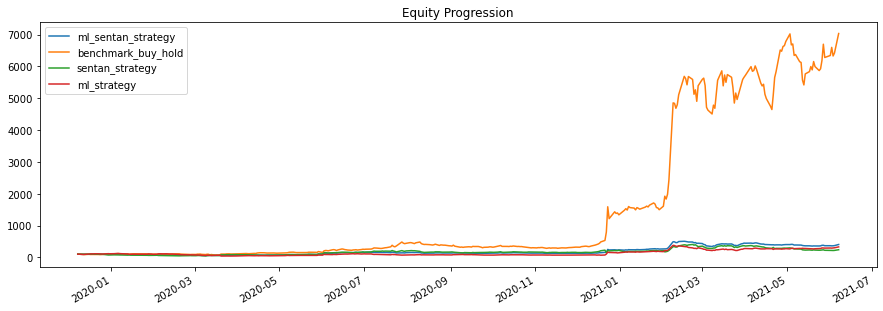

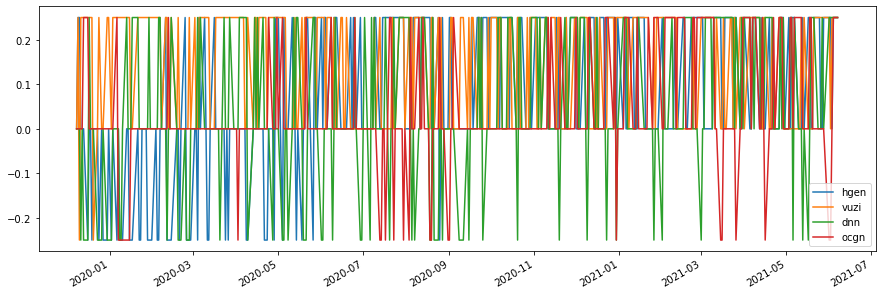

In [89]:
# Plot equity progression
ml_res.plot()

# Print performance values
ml_res.display()

# Check for anomalies in equity allocation
ml_res.plot_security_weights()